In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



### Notions d'histogrammes  et de niveau de gris


(337, 450, 3)


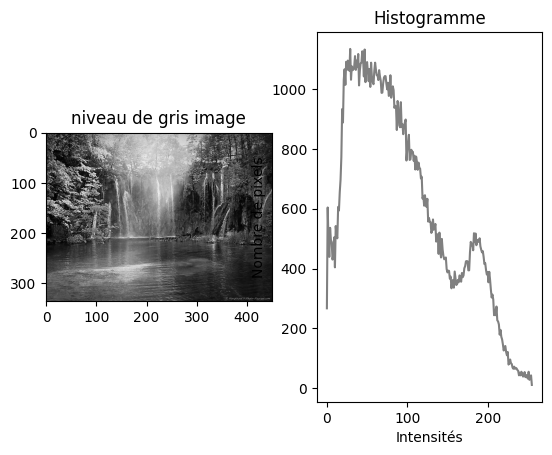

In [17]:
# Chargement de l'image

#img = cv2.imread("datas/b&w.png")  
img = cv2.imread("datas/pays.jpg") # en couleur
#img = cv2.imread("datas/couleurs7.jpg")
#img = cv2.imread("datas/vrj.png")

print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # transformation en R-G-B

# Conversion de l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcul de l'histogramme
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Tracé de l'histogramme

plt.subplot(121).imshow(gray)

plt.title("niveau de gris image")
plt.imshow(gray, cmap="gray")

plt.subplot(122).plot(hist, color='gray')

plt.xlabel('Intensités')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme')

plt.show()


### Couleur : histogramme pour chaque canal (R-G-B)

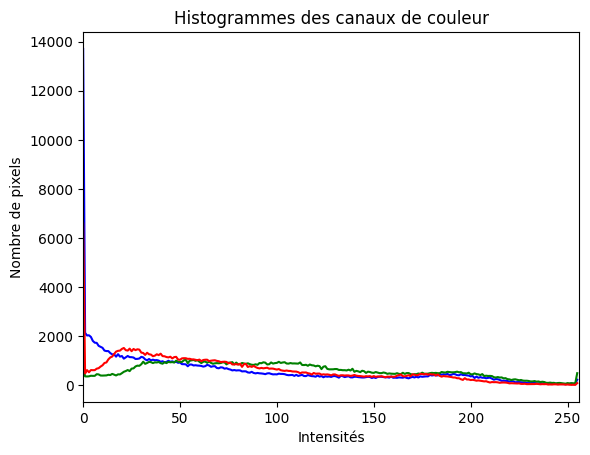

In [18]:
# Séparation des canaux de couleur
channels = cv2.split(img)
colors = ('b','g','r')

# Tracé des histogrammes pour chaque canal
plt.figure()
plt.title("Histogrammes des canaux de couleur")
plt.xlabel("Intensités")
plt.ylabel("Nombre de pixels")

for (channel,color) in zip(channels,colors):
    hist = cv2.calcHist([channel],[0],None,[256],[0,256])
    plt.plot(hist, color = color)
    plt.xlim([0,256])

plt.show()

### visualisation d'images pour chaque canal

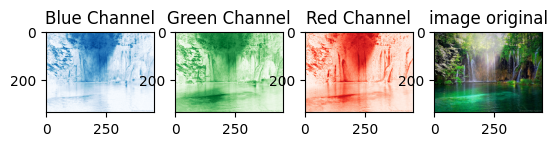

In [19]:
b, g, r = cv2.split(img)

# Create a figure with subplots
fig, axs = plt.subplots(1, 4)

# Plot each channel on a subplot
axs[0].imshow(b, cmap='Blues')
axs[0].set_title('Blue Channel')
axs[1].imshow(g, cmap='Greens')
axs[1].set_title('Green Channel')
axs[2].imshow(r, cmap='Reds')
axs[2].set_title('Red Channel')
axs[3].imshow(img)
axs[3].set_title('image original')

# Show the plot
plt.show()

### Egalisation d'histogrrammes

In [9]:
%matplotlib inline 

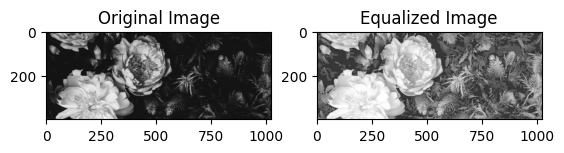

In [20]:
# Perform histogram equalization using OpenCV
img1 = cv2.imread('datas/flower.jpg')
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

equalized_img = cv2.equalizeHist(gray)



hist2 = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Plot the original and equalized images using Matplotlib
fig, axs = plt.subplots(1, 2)
axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized_img, cmap='gray')
axs[1].set_title('Equalized Image')



# Show the plot
plt.show()

### comparaison des histogrammes 

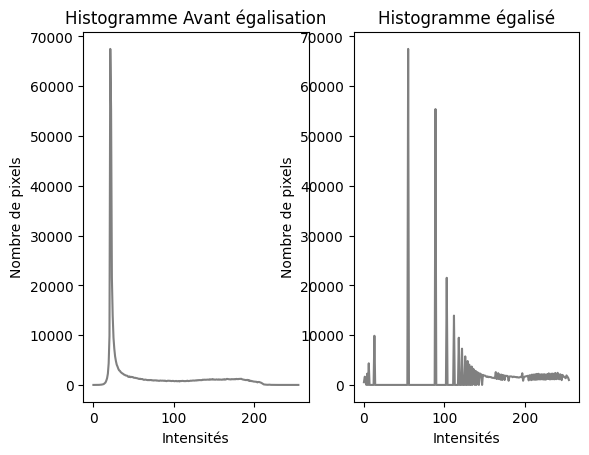

In [21]:
# différent histogramme 

plt.subplot(121).plot(hist, color='gray' )

plt.xlabel('Intensités')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme Avant égalisation')

plt.subplot(122).plot(hist2, color='gray' )
plt.xlabel('Intensités')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme égalisé')

plt.show()

### Egalisation adaptative

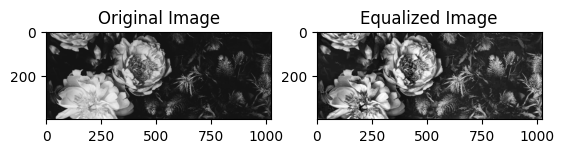

In [23]:
img_a = cv2.imread('datas/flower.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Perform adaptive histogram equalization using OpenCV
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
equalized = clahe.apply(gray)

# Convert the data type of the image to uint8
equalized = np.asarray(equalized, dtype=np.uint8)



#Plot the original and equalized images using Matplotlib

fig, axs = plt.subplots(1, 2)
axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(equalized, cmap='gray')
axs[1].set_title('Equalized Image')


#Show the plot
plt.show()

### visualisation de l'histogramme 

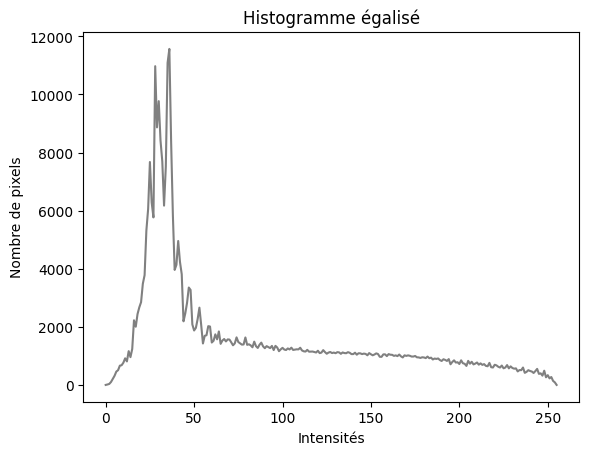

In [16]:

hist_a = cv2.calcHist([equalized], [0], None, [256], [0, 256])

plt.plot(hist_a, color='gray' )
plt.xlabel('Intensités')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme adaptive')

plt.show()